# Quick Start — pyhvdfa

Compute and plot the H/V spectral ratio for a simple two-layer model using the
Diffuse Field Assumption (DFA) of Sánchez-Sesma et al. (2011).

In [1]:
import matplotlib.pyplot as plt
from pyhvdfa import compute_hv, Layer, Model

## Define the model

A two-layer model: 20 m of soft sediment (Vs = 200 m/s) over a stiffer halfspace (Vs = 800 m/s).

In [2]:
model = Model.from_layers([
    Layer(thickness=20.0,  vp=500.0,  vs=200.0,  density=1800.0),  # soft sediment
    Layer(thickness=0.0,   vp=1800.0, vs=800.0,  density=2200.0),  # halfspace
])

print(f"Layers : {model.n}")
print(f"Vs     : {model.bta} m/s")
print(f"Thickness: {model.h} m  (halfspace excluded)")

Layers : 2
Vs     : [200. 800.] m/s
Thickness: [20.] m  (halfspace excluded)


## Compute H/V

`compute_hv` returns an `HVResult` with `freq` (Hz) and `hv` arrays.  
The theoretical fundamental-mode peak for a single layer over a halfspace is
$f_0 = V_S / (4H) \approx 2.5\,\text{Hz}$.

In [3]:
result = compute_hv(model, freq_min=0.5, freq_max=20.0, n_freq=200)

peak_idx = result.hv.argmax()
print(f"Peak H/V : {result.hv[peak_idx]:.2f}")
print(f"Peak freq: {result.freq[peak_idx]:.2f} Hz  (expected ≈ 2.5 Hz)")

Peak H/V : 9.02
Peak freq: 2.51 Hz  (expected ≈ 2.5 Hz)


## Plot

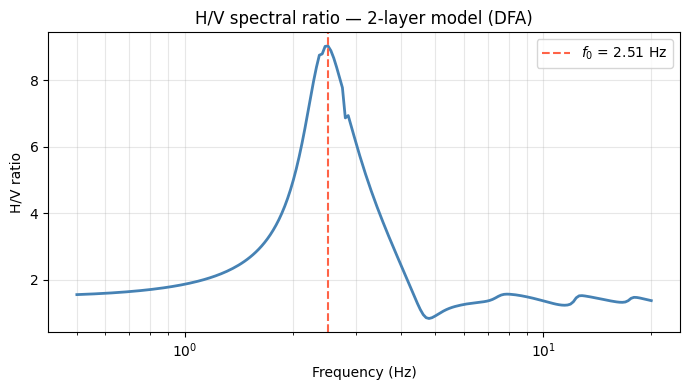

In [4]:
fig, ax = plt.subplots(figsize=(7, 4))

ax.semilogx(result.freq, result.hv, color="steelblue", linewidth=2)
ax.axvline(result.freq[peak_idx], color="tomato", linestyle="--",
           label=f"$f_0$ = {result.freq[peak_idx]:.2f} Hz")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("H/V ratio")
ax.set_title("H/V spectral ratio — 2-layer model (DFA)")
ax.legend()
ax.grid(True, which="both", alpha=0.3)
plt.tight_layout()
plt.show()